# Principal Component Analysis (PCA)

## Brief primer and history
Principal component analysis (PCA) is a statistical procedure that uses an [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) to convert a set of observations of possibly correlated variables into a set of values of [linearly uncorrelated](https://en.wikipedia.org/wiki/Correlation_and_dependence) variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible [variance](https://en.wikipedia.org/wiki/Variance) (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is [orthogonal](https://en.wikipedia.org/wiki/Orthogonal) the preceding components. The resulting vectors are an uncorrelated [orthogonal basis set](https://en.wikipedia.org/wiki/Orthogonal_basis_set). 

PCA is sensitive to the relative scaling of the original variables.

PCA was invented in 1901 by [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by [Harold Hotelling](https://en.wikipedia.org/wiki/Harold_Hotelling) in the 1930s.

## Mathematical details
PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.[3]

Consider a data matrix, $\mathbf{X}$, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the $n$ rows represents a different repetition of the experiment, and each of the $p$ columns gives a particular kind of feature (say, the results from a particular sensor).

Mathematically, the transformation is defined by a set of p-dimensional vectors of weights or loadings
${\displaystyle \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}} \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}$ that map each row vector ${\displaystyle \mathbf {x} _{(i)}} \mathbf{x}_{(i)}$ of $\mathbf{X}$ to a new vector of principal component scores ${\displaystyle \mathbf {t} _{(i)}=(t_{1},\dots ,t_{m})_{(i)}}$ given by

$${\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m} {\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m}$$

in such a way that the individual variables ${\displaystyle t_{1},\dots ,t_{m}}$ of t considered over the data set successively inherit the maximum possible variance from $\mathbf{x}$, with each loading vector $\mathbf{w}$ constrained to be a unit vector.

In order to maximize variance, the first loading vector $\mathbf {w} _{(1)}$ thus has to satisfy

$$ {\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(t_{1}\right)_{(i)}^{2}\right\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}}$$

Equivalently, writing this in matrix form gives

$${\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Xw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{T}\mathbf {X} ^{T}\mathbf {Xw} \right\}}$$

Since $\mathbf {w} _{(1)}$ has been defined to be a unit vector, it equivalently also satisfies
$${\displaystyle \mathbf {w} _{(1)}={\operatorname {\arg \,max} }\,\left\{{\frac {\mathbf {w} ^{T}\mathbf {X} ^{T}\mathbf {Xw} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$.

With $\mathbf {w} _{(1)}$ found, the first principal component of a data vector $\mathbf {x} _{(i)}$ can then be given as a score $\mathbf {t} _{(i)}$ = $\mathbf {x} _{(i)}$ ⋅ $\mathbf {w} _{(1)}$ in the transformed co-ordinates, or as the corresponding vector in the original variables, {$\mathbf {x} _{(i)}$ ⋅ $\mathbf {w} _{(1)}$} $\mathbf {w} _{(1)}$.

The $k^{th}$ component can be found by subtracting the first $k$ − 1 principal components from $\mathbf{X}$:

$${\displaystyle \mathbf {\hat {X}} _{k}=\mathbf {X} -\sum _{s=1}^{k-1}\mathbf {X} \mathbf {w} _{(s)}\mathbf {w} _{(s)}^{\rm {T}}}$$
and then finding the loading vector which extracts the maximum variance from this new data matrix

$${\displaystyle \mathbf {w} _{(k)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {arg\,max} }}\left\{\Vert \mathbf {\hat {X}} _{k}\mathbf {w} \Vert ^{2}\right\}={\operatorname {\arg \,max} }\,\left\{{\tfrac {\mathbf {w} ^{T}\mathbf {\hat {X}} _{k}^{T}\mathbf {\hat {X}} _{k}\mathbf {w} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$

Computing the [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) is now the standard way to calculate a principal components analysis from a data matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [3]:
df = pd.read_excel('./Datasets/wine-data.xlsx')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
# stats
df.iloc[:,1:].describe()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


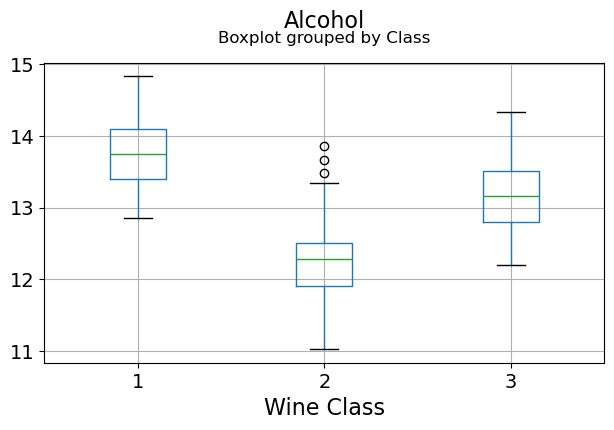

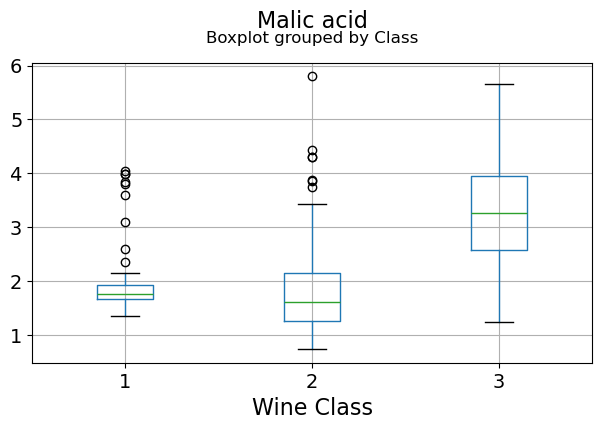

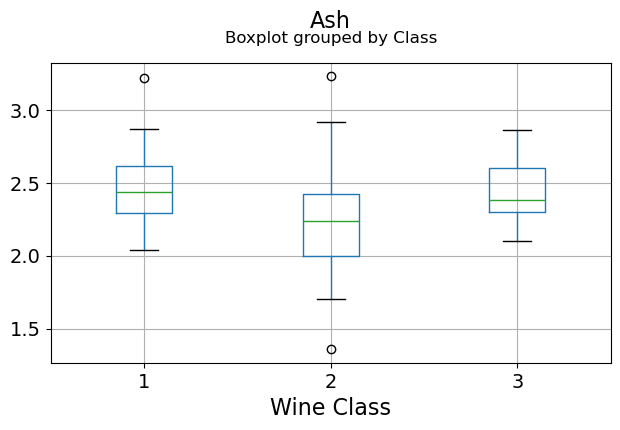

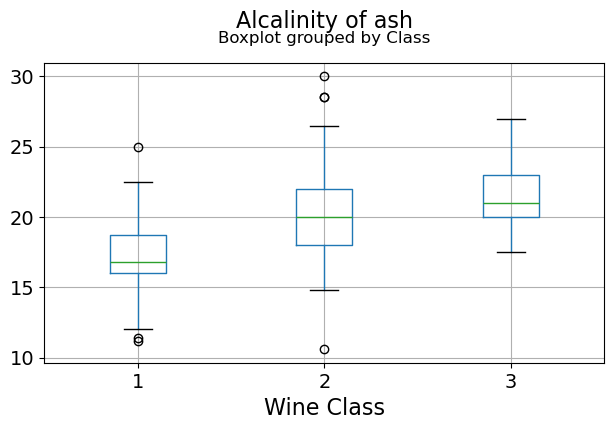

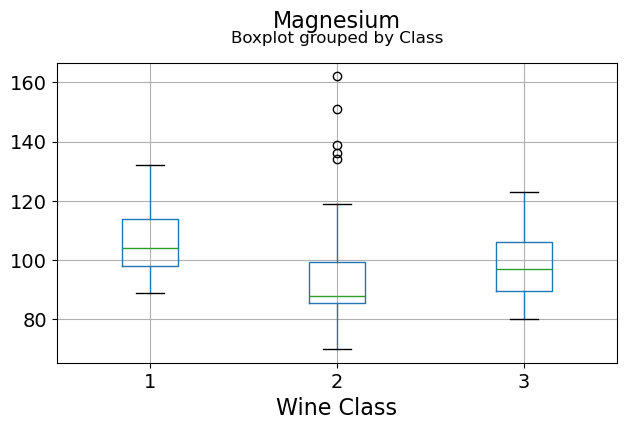

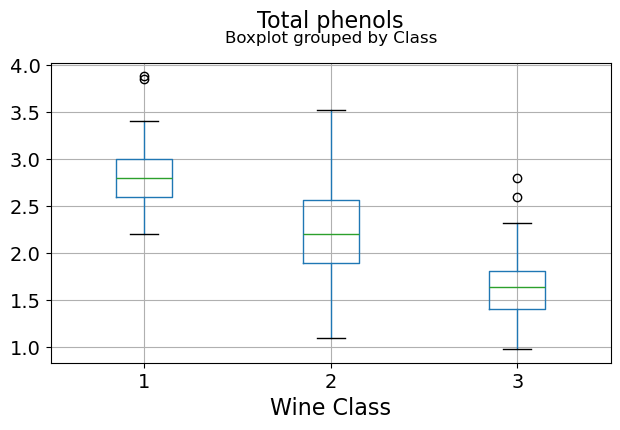

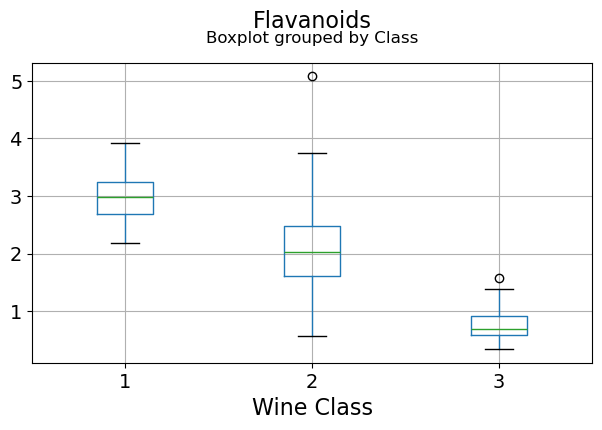

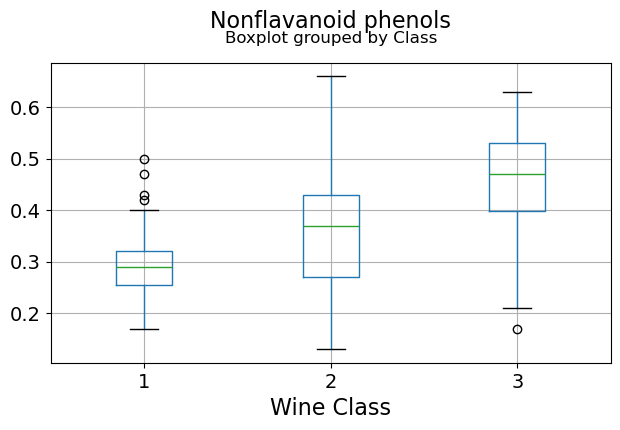

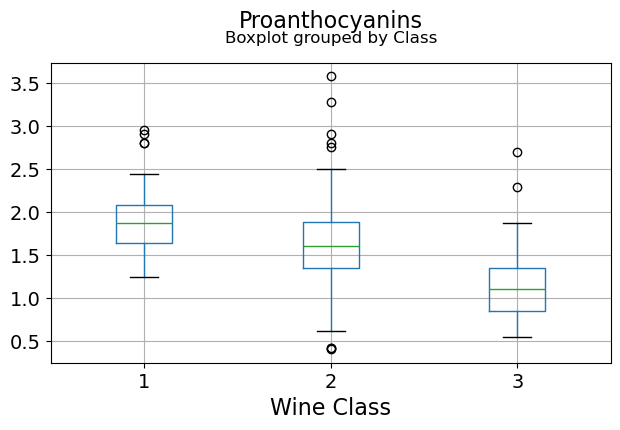

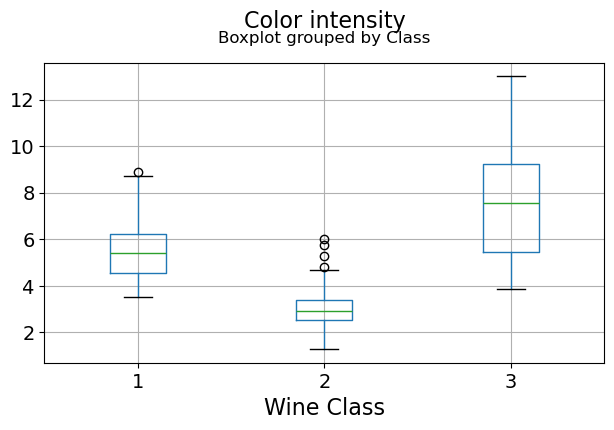

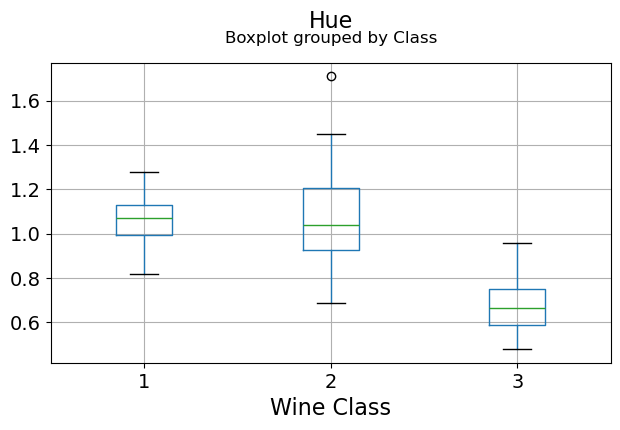

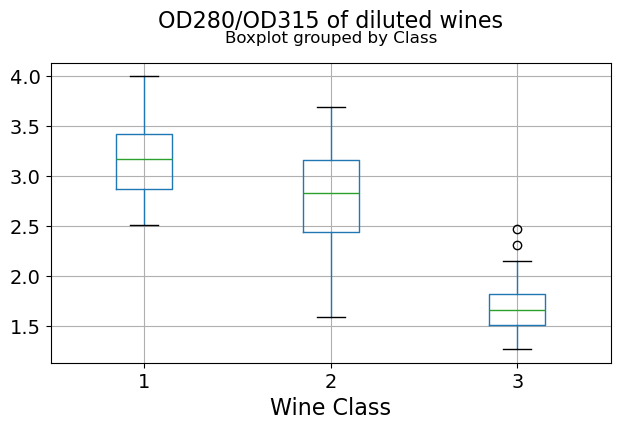

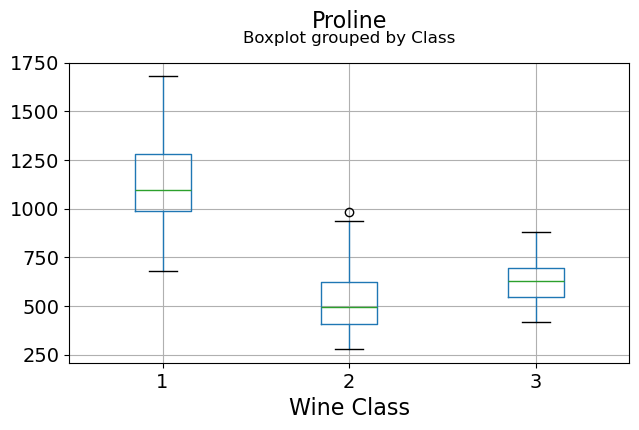

In [5]:
# box plot
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)


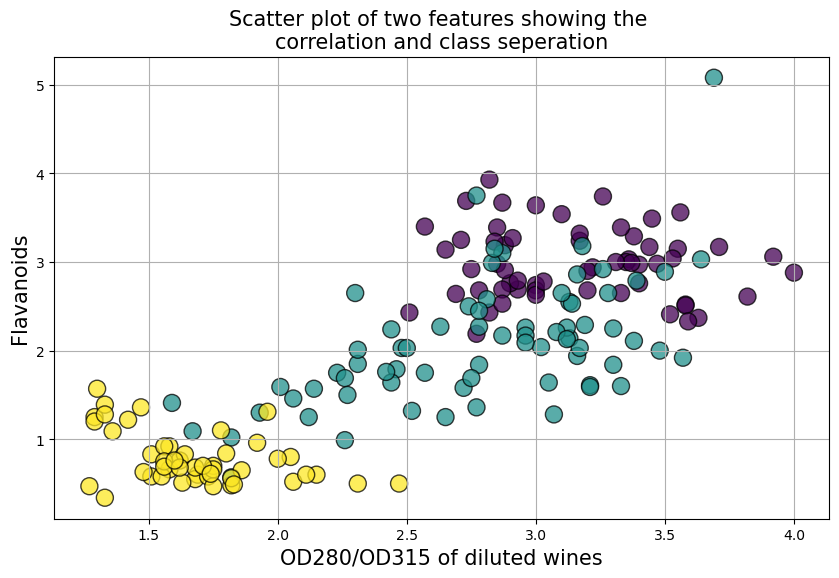

In [6]:
# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()


In [8]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Class',axis=1)
y = df['Class']

X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

dfx.head(10)
dfx.describe()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [9]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)


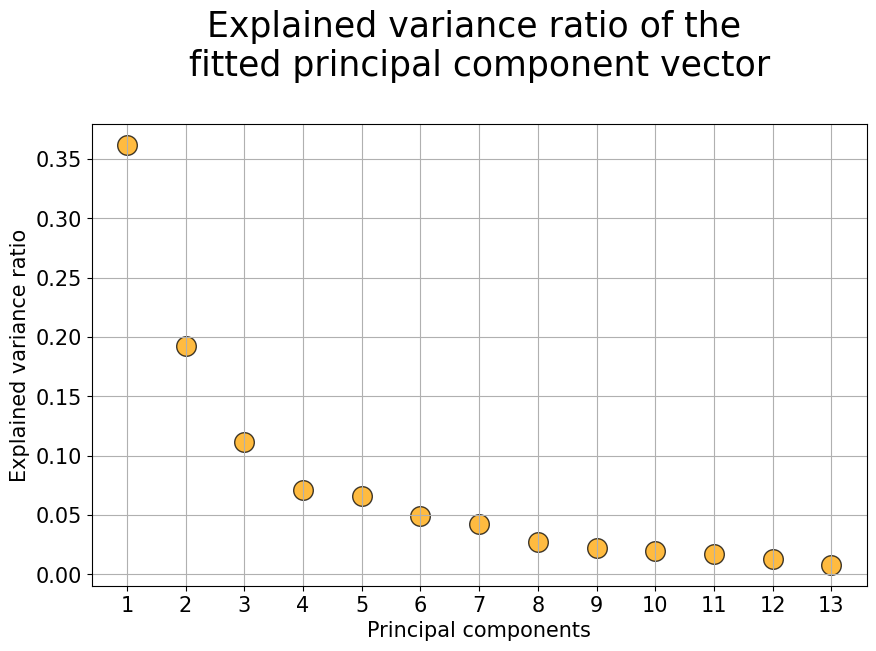

In [10]:
# plot PCA
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


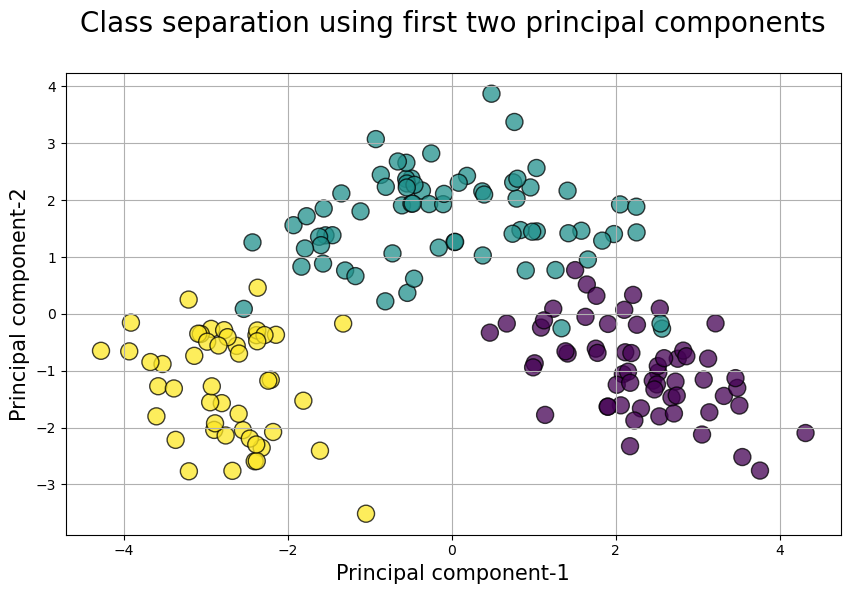

In [11]:
# transform
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()
